In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import confusion_matrix

In [2]:
def load_fashion_mnist():
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    return (x_train, y_train), (x_test, y_test)

In [3]:
def build_mediocre_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  
    ])
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [4]:
def build_optimized_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  
    ])
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [5]:
def train_and_evaluate_models():
    (x_train, y_train), (x_test, y_test) = load_fashion_mnist()
    
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    print("Training Mediocre Model...")
    mediocre_model = build_mediocre_model()
    history_mediocre = mediocre_model.fit(x_train, y_train, epochs=4, validation_split=0.2, callbacks=[early_stopping])
    test_loss_mediocre, test_acc_mediocre = mediocre_model.evaluate(x_test, y_test)
    print(f"Mediocre Model - Test Accuracy: {test_acc_mediocre:.4f}, Test Loss: {test_loss_mediocre:.4f}")
    
    print("\nTraining Optimized Model...")
    optimized_model = build_optimized_model()
    history_optimized = optimized_model.fit(x_train, y_train, epochs=8, validation_split=0.2, callbacks=[early_stopping])
    test_loss_optimized, test_acc_optimized = optimized_model.evaluate(x_test, y_test)
    print(f"Optimized Model - Test Accuracy: {test_acc_optimized:.4f}, Test Loss: {test_loss_optimized:.4f}")
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_mediocre.history['accuracy'], label='Mediocre Model - Training Accuracy')
    plt.plot(history_mediocre.history['val_accuracy'], label='Mediocre Model - Validation Accuracy')
    plt.plot(history_optimized.history['accuracy'], label='Optimized Model - Training Accuracy')
    plt.plot(history_optimized.history['val_accuracy'], label='Optimized Model - Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training and Validation Accuracy")
    
    y_pred = np.argmax(optimized_model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - Optimized Model")
    
    plt.show()

Training Mediocre Model...


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.7740 - loss: 0.6244 - val_accuracy: 0.8704 - val_loss: 0.3577
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8816 - loss: 0.3172 - val_accuracy: 0.8841 - val_loss: 0.3177
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9035 - loss: 0.2574 - val_accuracy: 0.9011 - val_loss: 0.2718
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9199 - loss: 0.2178 - val_accuracy: 0.8998 - val_loss: 0.2707
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9257 - loss: 0.1960 - val_accuracy: 0.9012 - val_loss: 0.2781
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9344 - loss: 0.1731 - val_accuracy: 0.9085 - val_loss: 0.2551
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9423 - loss: 0.1518 - val_accuracy: 0.9073 - val_loss: 0.2540
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9481 -

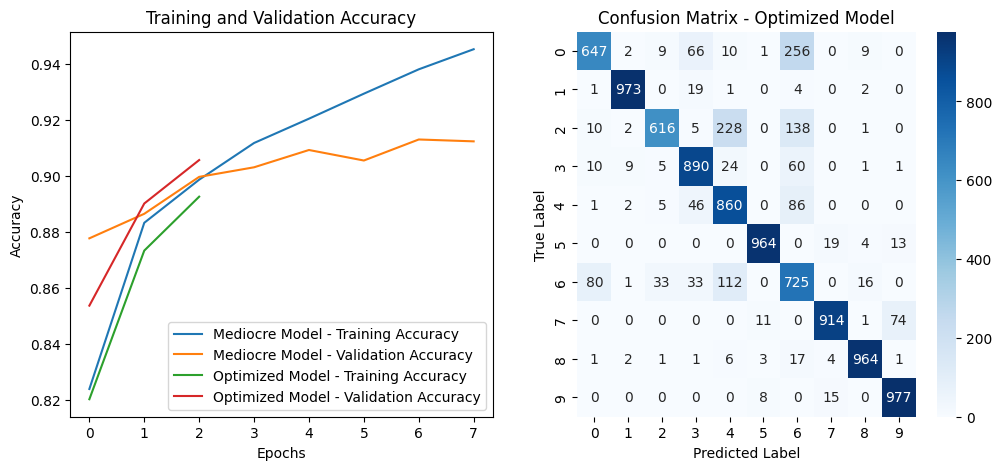

In [6]:
def main():
    (x_train, y_train), (x_test, y_test) = load_fashion_mnist()
    
    print("Training Mediocre Model...")
    mediocre_model = build_mediocre_model()
    mediocre_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
    
    print("\nTraining Optimized Model...")
    optimized_model = build_optimized_model()
    optimized_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
    train_and_evaluate_models()

if __name__ == "__main__":
    main()